In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn

In [28]:
# Parameters
weight = 0.7
bias = 0.3

In [29]:
# Synthetic Data with Gaussian Noise
X = np.random.rand(400, 1)
y = weight * X + bias + np.random.randn(400, 1) * 0.1

In [30]:
# Convert to PyTorch tensors
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()

In [31]:
# Splitting data into training and testing sets
train_split = int(0.8 * len(X_tensor))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print('Train samples:', len(X_train))
print('Test samples :', len(X_test))

Train samples: 320
Test samples : 80


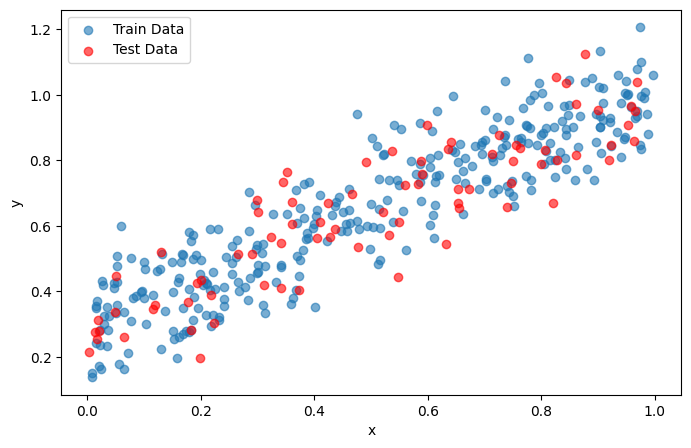

In [32]:
# Visualize Data (train and test)
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, alpha=0.6, label="Train Data")
plt.scatter(X_test, y_test, c="red", alpha=0.6, label="Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [33]:
# Building a Linear Regression Model Class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + bias

In [34]:
# Create an instance of the model
lin_reg_model_0 = LinearRegressionModel()
lin_reg_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [35]:
with torch.inference_mode():
    y_preds = lin_reg_model_0(X_test)

y_preds[:5], y_test[:5]

/var/folders/t5/pnfh13sd6mx11zzqg0jys72w0000gq/T/ipykernel_22272/1878590508.py:13: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return self.weights * x + bias


(tensor([[0.3056],
         [0.3737],
         [0.3754],
         [0.4791],
         [0.5265]], dtype=torch.float64),
 array([[0.25614891],
        [0.3905456 ],
        [0.30375607],
        [0.57194632],
        [0.71154784]]))